In [ ]:
# Import packages
# Basic Libraries
import pandas as pd
import numpy as np

# Machine Learning & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Deep Learning Libraries
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
!pip install pandas pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

# Force remount the drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
file_path = "/content/drive/My Drive/microorganisms.dta"
df = pd.read_stata(file_path)

# Check the dataset
df.head()

,mo,fullname,status,kingdom,phylum,class,order,family,genus,species,...,lpsn_parent,lpsn_renamed_to,mycobank,mycobank_parent,mycobank_renamed_to,gbif,gbif_parent,gbif_renamed_to,prevalence,snomed
0,B_GRAMN,(unknown Gram-negatives),unknown,Bacteria,(unknown phylum),(unknown class),(unknown order),(unknown family),(unknown genus),(unknown species),...,,,,,,,,,2.0,
1,B_GRAMP,(unknown Gram-positives),unknown,Bacteria,(unknown phylum),(unknown class),(unknown order),(unknown family),(unknown genus),(unknown species),...,,,,,,,,,2.0,
2,B_ANAER-NEG,(unknown anaerobic Gram-negatives),unknown,Bacteria,(unknown phylum),(unknown class),(unknown order),(unknown family),(unknown genus),(unknown species),...,,,,,,,,,2.0,
3,B_ANAER-POS,(unknown anaerobic Gram-positives),unknown,Bacteria,(unknown phylum),(unknown class),(unknown order),(unknown family),(unknown genus),(unknown species),...,,,,,,,,,2.0,
4,B_ANAER,(unknown anaerobic bacteria),unknown,Bacteria,(unknown phylum),(unknown class),(unknown order),(unknown family),(unknown genus),(unknown species),...,,,,,,,,,2.0,


In [ ]:
print(df.dtypes)

mo                      object
fullname                object
status                  object
kingdom                 object
phylum                  object
class                   object
order                   object
family                  object
genus                   object
species                 object
subspecies              object
rank                    object
ref                     object
oxygen_tolerance        object
source                  object
lpsn                    object
lpsn_parent             object
lpsn_renamed_to         object
mycobank                object
mycobank_parent         object
mycobank_renamed_to     object
gbif                    object
gbif_parent             object
gbif_renamed_to         object
prevalence             float64
snomed                  object
dtype: object


In [ ]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.shape

(78678, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78678 entries, 0 to 78677
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mo                   78678 non-null  object 
 1   fullname             78678 non-null  object 
 2   status               78678 non-null  object 
 3   kingdom              78678 non-null  object 
 4   phylum               78678 non-null  object 
 5   class                78678 non-null  object 
 6   order                78678 non-null  object 
 7   family               78678 non-null  object 
 8   genus                78678 non-null  object 
 9   species              78678 non-null  object 
 10  subspecies           78678 non-null  object 
 11  rank                 78678 non-null  object 
 12  ref                  78678 non-null  object 
 13  oxygen_tolerance     78678 non-null  object 
 14  source               78678 non-null  object 
 15  lpsn                 78678 non-null 

In [ ]:
df.isnull().sum()

,0
mo,0
fullname,0
status,0
kingdom,0
phylum,0
class,0
order,0
family,0
genus,0
species,0


In [ ]:
df.describe()

,prevalence
count,78678.000000
mean,1.646383
std,0.386727
min,1.000000
25%,1.250000
50%,2.000000
75%,2.000000
max,2.000000


In [ ]:
# Check data types of all columns
print(df.dtypes)

mo                      object
fullname                object
status                  object
kingdom                 object
phylum                  object
class                   object
order                   object
family                  object
genus                   object
species                 object
subspecies              object
rank                    object
ref                     object
oxygen_tolerance        object
source                  object
lpsn                    object
lpsn_parent             object
lpsn_renamed_to         object
mycobank                object
mycobank_parent         object
mycobank_renamed_to     object
gbif                    object
gbif_parent             object
gbif_renamed_to         object
prevalence             float64
snomed                  object
dtype: object


In [ ]:
# Check for missing or empty string values
print(df.isnull().sum())  # Check for NaN
print((df == '').sum())  # Check for empty strings

mo                     0
fullname               0
status                 0
kingdom                0
phylum                 0
class                  0
order                  0
family                 0
genus                  0
species                0
subspecies             0
rank                   0
ref                    0
oxygen_tolerance       0
source                 0
lpsn                   0
lpsn_parent            0
lpsn_renamed_to        0
mycobank               0
mycobank_parent        0
mycobank_renamed_to    0
gbif                   0
gbif_parent            0
gbif_renamed_to        0
prevalence             0
snomed                 0
dtype: int64
mo                         0
fullname                   0
status                     0
kingdom                    0
phylum                  1091
class                   1418
order                   2209
family                  5791
genus                   2874
species                11662
subspecies             72883
rank              

In [ ]:
# Drop only existing columns to avoid KeyError
cols_to_drop = ['mo', 'fullname', 'ref', 'lpsn_renamed_to', 'mycobank_renamed_to', 'gbif_renamed_to', 'snomed']

# Check which columns exist before dropping
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

# Drop existing columns safely
df = df.drop(columns=existing_cols_to_drop)


In [ ]:
print(df.columns)





Index(['status', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus',
       'species', 'subspecies', 'rank', 'oxygen_tolerance', 'source', 'lpsn',
       'lpsn_parent', 'mycobank', 'mycobank_parent', 'gbif', 'gbif_parent',
       'prevalence'],
      dtype='object')


In [ ]:
# Fill missing and empty string values with 'Unknown' for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].replace('', 'Unknown')  # Replace empty strings with 'Unknown'
    df[col] = df[col].fillna('Unknown')  # Correct approach without inplace




In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['genus'])  # Exclude target column
y = df['genus']

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMax scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMax scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(X_train.shape, X_test.shape)



(62942, 18) (15736, 18)


In [ ]:
print(df.columns)


Index(['status', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus',
       'species', 'subspecies', 'rank', 'oxygen_tolerance', 'source', 'lpsn',
       'lpsn_parent', 'mycobank', 'mycobank_parent', 'gbif', 'gbif_parent',
       'prevalence'],
      dtype='object')


In [ ]:
# Confirm that no missing values remain
print(df.isnull().sum())



status              0
kingdom             0
phylum              0
class               0
order               0
family              0
genus               0
species             0
subspecies          0
rank                0
oxygen_tolerance    0
source              0
lpsn                0
lpsn_parent         0
mycobank            0
mycobank_parent     0
gbif                0
gbif_parent         0
prevalence          0
dtype: int64


In [ ]:
# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
# Check class distribution
class_counts = y.value_counts()

# Drop rare classes with less than 2 samples
rare_classes = class_counts[class_counts < 2].index
df = df[~df['genus'].isin(rare_classes)]

# Re-define X and y after removing rare classes
X = df.drop(columns=['genus'])
y = df['genus']

# Split again after filtering rare classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform numerical columns in X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(df.head())

   status  kingdom  phylum  class  order  family  genus  species  subspecies  \
0       3        3       0      0      0       0      0        0           0   
1       3        3       0      0      0       0      0        0           0   
2       3        3       0      0      0       0      0        0           0   
3       3        3       0      0      0       0      0        0           0   
4       3        3       0      0      0       0      0        0           0   

   rank  oxygen_tolerance  source   lpsn  lpsn_parent  mycobank  \
0     0                 0       3  32925         6644     17776   
1     0                 0       3  32925         6644     17776   
2     0                 0       3  32925         6644     17776   
3     0                 0       3  32925         6644     17776   
4     0                 0       3  32925         6644     17776   

   mycobank_parent   gbif  gbif_parent  prevalence  
0             1316  48803         9103         2.0  
1         

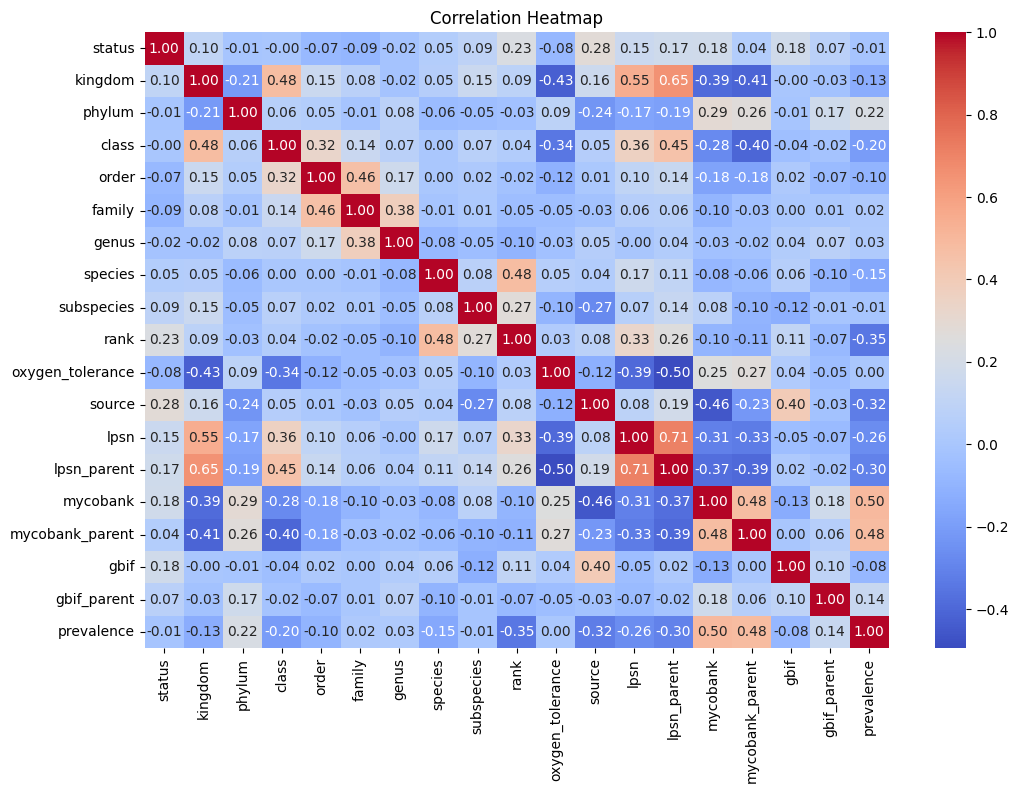

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Build and Train Autoencoder + DNN

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

input_dim = X_train_scaled.shape[1]
input_layer = Input(shape=(input_dim,))

# Encoder with more layers and neurons
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dropout(0.3)(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(0.3)(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)



In [ ]:
from tensorflow.keras.optimizers import Adam

# Use Adam optimizer with a defined learning rate
optimizer = Adam(learning_rate=0.001)

# Compile autoencoder with appropriate loss function
autoencoder.compile(optimizer=optimizer, loss='mse')

# Fit the autoencoder model
history = autoencoder.fit(
    X_train_scaled, X_train_scaled,  # Input and target should be the same for autoencoder
    epochs=100,                      # Increase epochs if necessary
    batch_size=64,
    validation_split=0.2,            # 20% of training data used for validation
    verbose=1                        # To see training progress
)


In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Apply VarianceThreshold to numeric columns
selector = VarianceThreshold(threshold=0.01)  # You can adjust the threshold
selector.fit(numeric_df)

# Identify low variance columns in numeric_df
low_variance_cols = numeric_df.columns[~selector.get_support()].tolist()
print("Low variance columns to drop:", low_variance_cols)

# Drop low variance columns from the original DataFrame
df.drop(columns=low_variance_cols, inplace=True)

Low variance columns to drop: []


In [ ]:
# Set a lower threshold (e.g., 0.001 or lower)
threshold = 0.001
# Select only numeric columns for variance check
numeric_cols = df.select_dtypes(include=[float, int]).columns

# Apply VarianceThreshold only on numeric columns
selector = VarianceThreshold(threshold=threshold)
selector.fit(df[numeric_cols])

# Identify low variance numeric columns
low_variance_cols = numeric_cols[~selector.get_support()].tolist()
print("Low variance columns to drop:", low_variance_cols)

# Drop low variance columns from df
df_reduced = df.drop(columns=low_variance_cols)
print(f"Shape after dropping low variance columns: {df_reduced.shape}")

Low variance columns to drop: []
Shape after dropping low variance columns: (78678, 26)


In [ ]:
# Correlation threshold (e.g., 0.9)
correlation_threshold = 0.9

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Identify correlated columns
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop correlated columns
df_reduced = df.drop(columns=correlated_features)
print(f"Shape after dropping correlated features: {df_reduced.shape}")
print("Dropped correlated columns:", correlated_features)

Shape after dropping correlated features: (78678, 25)
Dropped correlated columns: {'kingdom'}


In [ ]:
# Select only non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding to each non-numeric column
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder if you need to reverse the transformation

print(f"Shape after Label Encoding: {df.shape}")

Shape after Label Encoding: (78678, 26)


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include=[float, int]))

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {df.shape}, Transformed shape after PCA: {X_pca.shape}")

Original shape: (78678, 26), Transformed shape after PCA: (78678, 20)


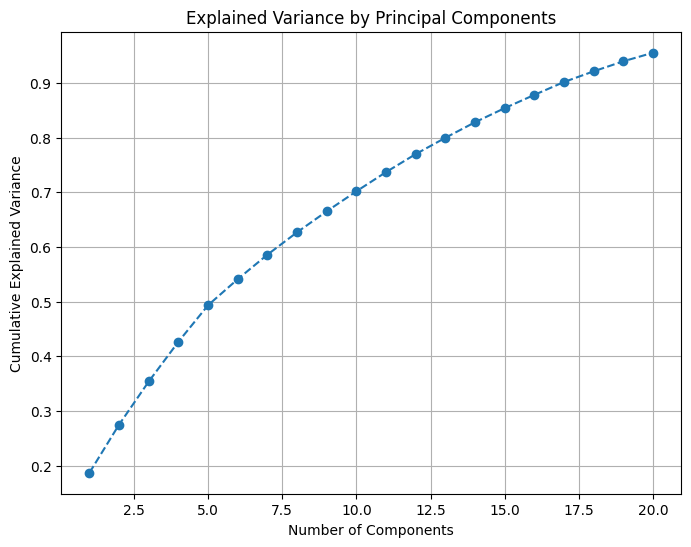

Variance explained by first 5 components: [0.18723646 0.27532138 0.35411316 0.4268206  0.49354518]


In [ ]:
# Check variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Print variance explained by first few components
print(f"Variance explained by first 5 components: {cumulative_variance[:5]}")

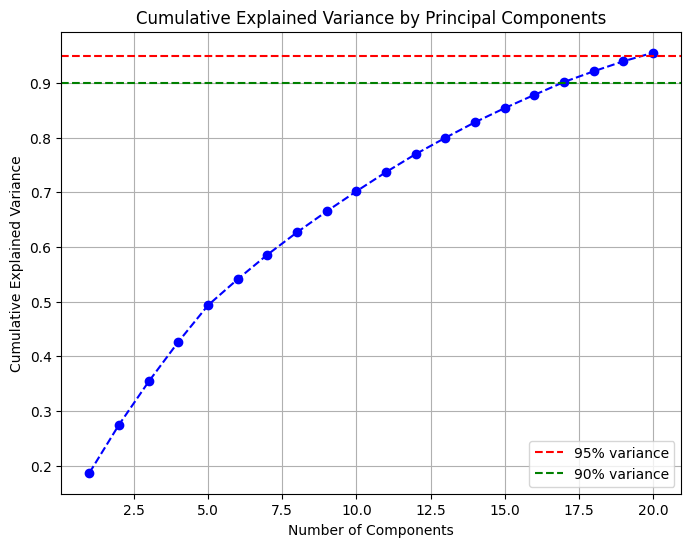

In [ ]:
# Plot cumulative variance for all components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% variance')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Apply PCA with 15 components
pca_90 = PCA(n_components=15)
X_pca_90 = pca_90.fit_transform(X_scaled)

print(f"Reduced shape with 15 components: {X_pca_90.shape}")

Reduced shape with 15 components: (78678, 15)


In [ ]:
# Apply PCA with 18 components
pca_95 = PCA(n_components=18)
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"Reduced shape with 18 components: {X_pca_95.shape}")

Reduced shape with 18 components: (78678, 18)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78678 entries, 0 to 78677
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mo                   78678 non-null  float64
 1   fullname             78678 non-null  float64
 2   status               78678 non-null  float64
 3   kingdom              78678 non-null  float64
 4   phylum               78678 non-null  float64
 5   class                78678 non-null  float64
 6   order                78678 non-null  float64
 7   family               78678 non-null  float64
 8   genus                78678 non-null  int64  
 9   species              78678 non-null  float64
 10  subspecies           78678 non-null  float64
 11  rank                 78678 non-null  float64
 12  ref                  78678 non-null  float64
 13  oxygen_tolerance     78678 non-null  float64
 14  source               78678 non-null  float64
 15  lpsn                 78678 non-null 

In [ ]:
df.isnull().sum()

,0
mo,0
fullname,0
status,0
kingdom,0
phylum,0
class,0
order,0
family,0
genus,0
species,0


In [ ]:
print(df['genus'].head())
print(df['genus'].dtype)

0    8463
1    8463
2    8463
3    8463
4    8463
Name: genus, dtype: int64
int64


In [ ]:
# Combined check for NaN and empty string
missing_values = df.isnull().sum().sum()  # Total NaN values
empty_strings = (df == '').sum().sum()   # Total empty strings

if missing_values == 0 and empty_strings == 0:
    print("No missing or empty values detected in the dataset.")
else:
    print(f"Warning: Dataset contains {missing_values} missing and {empty_strings} empty string values.")

✅ No missing or empty values detected in the dataset.


In [ ]:
df.isnull().sum()

,0
mo,0
fullname,0
status,0
kingdom,0
phylum,0
class,0
order,0
family,0
genus,0
species,0


In [ ]:
# Split: Training: 70%, Validation: 15%, Test 15%
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.30, random_state=42, stratify=y)

# 2. Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

#  Print final shapes
print(f"Training Set Shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Validation Set Shape: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Test Set Shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training Set Shape: X_train: (55074, 20), y_train: (55074,)
Validation Set Shape: X_val: (11802, 20), y_val: (11802,)
Test Set Shape: X_test: (11802, 20), y_test: (11802,)


In [ ]:
# Define Features and Target
X = df[['kingdom', 'phylum', 'class', 'order', 'family', 'oxygen_tolerance', 'prevalence', 'lpsn', 'mycobank', 'gbif']]

# Define Target: Genus
target_col = 'genus'
y = df[target_col]

In [ ]:
print(df['genus'].head())
print(df['genus'].dtype)

0    8463
1    8463
2    8463
3    8463
4    8463
Name: genus, dtype: int64
int64


In [ ]:
print(df['genus'].head(10))  # Check the first 10 values
print(df['genus'].dtype)      # Check the data type

0    8463
1    8463
2    8463
3    8463
4    8463
5    8463
6    8463
7    8463
8    8463
9       1
Name: genus, dtype: int64
int64


In [ ]:
input_shape = (X_train.shape[1], 1)

input_layer = Input(shape=input_shape)

# CNN layers
x = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(filters=32, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)

output_layer = Dense(1, activation='linear')(x)  # Linear activation for regression

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 20, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 18, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 9, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 7, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,169 (106.13 KB)

 Trainable params: 27,169 (106.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2996 - mae: 0.4053 - val_loss: 0.0455 - val_mae: 0.1303
Epoch 2/100
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0497 - mae: 0.1362 - val_loss: 0.0532 - val_mae: 0.1312
Epoch 3/100
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0383 - mae: 0.1143 - val_loss: 0.0500 - val_mae: 0.1236
Epoch 4/100
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0303 - mae: 0.0984 - val_loss: 0.0281 - val_mae: 0.0969
Epoch 5/100
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0301 - mae: 0.0940 - val_loss: 0.0244 - val_mae: 0.0739
Epoch 6/100
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0236 - mae: 0.0810 - val_loss: 0.0324 - val_mae: 0.1078
Epoch 7/100
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0216 - mae: 0.0761 - val_loss: 0.0265 - val_mae: 0.0832
Epoch 8/100
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0244 - mae: 0.0802 - val_loss: 0.0310 - val_mae: 0.0884
Epoch 9/100
1377/1377 ━━━━━━━━━━

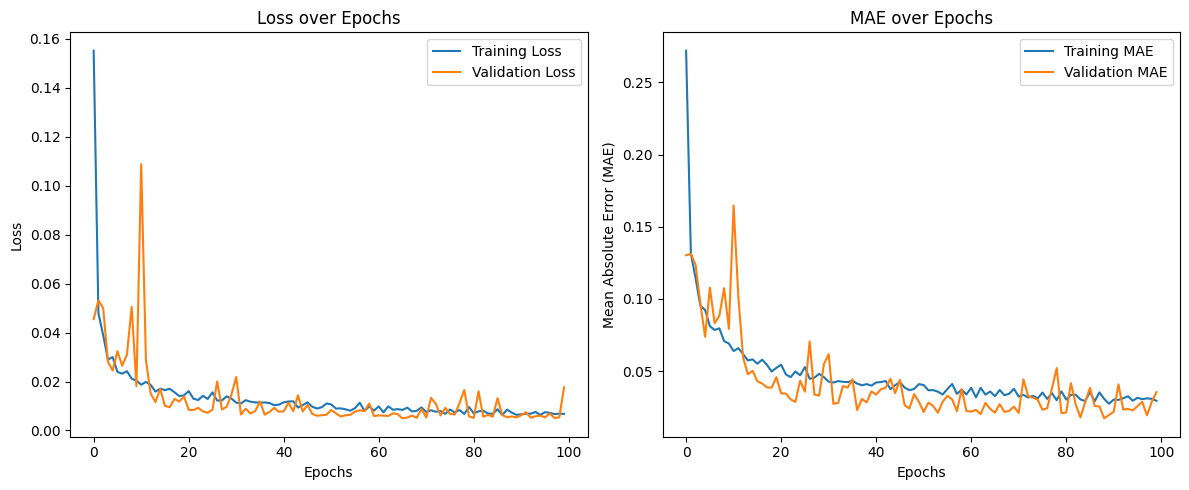

In [ ]:
# Plot training & validation loss and MAE
def plot_history(history):
    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('MAE over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_history(history)


369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


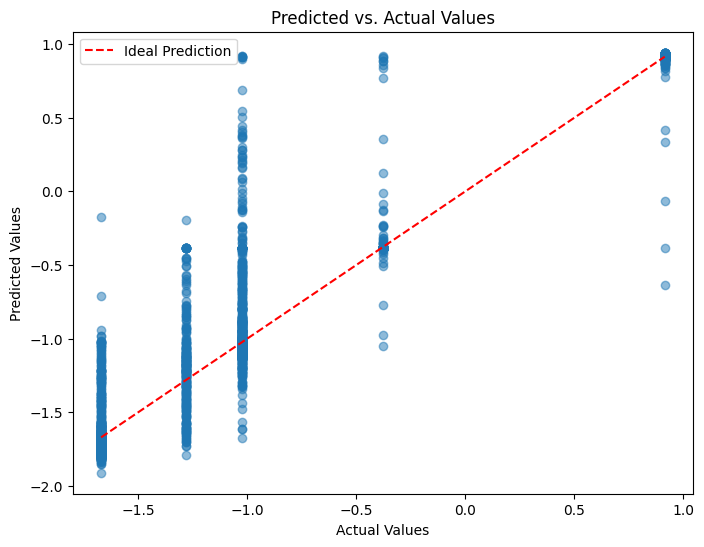

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.flatten()

# Visualise the obtained values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0182 - mae: 0.0360
Test Loss: 0.0166
Test MAE: 0.0349


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Reshape predictions if necessary
y_pred = y_pred.flatten()

# Print a sample of predictions and true values
for i in range(10):
    # Use .iloc to access by position
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]:.4f}")

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Actual: 0.9143904300309246, Predicted: 0.9330
Actual: -0.37851929673060214, Predicted: -0.3854
Actual: -1.0249741601113656, Predicted: -1.0216
Actual: -1.0249741601113656, Predicted: -1.0267
Actual: 0.9143904300309246, Predicted: 0.9228
Actual: 0.9143904300309246, Predicted: 0.9231
Actual: 0.9143904300309246, Predicted: 0.9160
Actual: 0.9143904300309246, Predicted: 0.9235
Actual: 0.9143904300309246, Predicted: 0.9167
Actual: 0.9143904300309246, Predicted: 0.9156
